# Hackathon FinTech Case Itmo
## Kirill Zakharov
2022

In [1]:
import numpy as np
import pandas as pd
import swifter
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
from skmultilearn.model_selection import iterative_train_test_split
import os
import json
import sklearn.utils as sku
from sklearn.metrics import fbeta_score, classification_report, confusion_matrix
%matplotlib inline

# plt.style.use('ggplot')
# sns.set_palette('mako')
sns.set_style('darkgrid')

In [44]:
# !pip install xgboost
from xgboost import XGBClassifier

In [45]:
PAYMENTS_TRAIN_PATH = 'data/data/payments_train.csv'
TARGET_TRAIN_PATH = 'data/data/target_train.csv'
PAYMENTS_TEST_PATH = 'data/data/payments_test.csv'
CLIENT_ID_TEST_PATH = 'data/data/client_id_test.csv'

In [46]:
payments_dtypes = {
    'client_id': str,
    'contractor_id': str,
    'is_outgoing': bool,
    'amount': 'uint64',
    'dt_day': 'uint16',
    'dt_hour': 'uint8',
    'channel': pd.CategoricalDtype()
}
for i in range(12):
    payments_dtypes[f'flag_{i}'] = bool

In [47]:
payments = pd.read_csv(PAYMENTS_TRAIN_PATH, dtype=payments_dtypes)

In [48]:
payments.head()

,client_id,contractor_id,is_outgoing,amount,dt_day,dt_hour,channel,flag_0,flag_1,flag_2,flag_3,flag_4,flag_5,flag_6,flag_7,flag_8,flag_9,flag_10,flag_11
0,569703,NaN,True,8674442,56,12,app,False,False,False,False,False,False,False,False,False,False,False,False
1,696595,3920,True,5714350,311,19,web,False,False,False,False,False,False,False,False,False,False,False,False
2,368467,NaN,True,3720501,175,13,NaN,False,False,False,True,False,False,False,False,False,False,False,False
3,421133,NaN,True,311542,68,14,NaN,False,False,False,True,False,False,False,False,False,False,False,False
4,365044,24686,True,705918747,171,15,app,False,False,False,False,False,False,False,False,False,False,False,False


In [37]:
sort_payments = payments.sort_values(by=['client_id', 'dt_day', 'dt_hour'])

In [38]:
sort_payments['contractor_id'] = sort_payments['contractor_id'].fillna(method='bfill')

In [39]:
sort_payments

,client_id,contractor_id,is_outgoing,amount,dt_day,dt_hour,channel,flag_0,flag_1,flag_2,flag_3,flag_4,flag_5,flag_6,flag_7,flag_8,flag_9,flag_10,flag_11
15262037,100045,15624,True,436225,0,6,NaN,False,False,False,False,False,False,False,False,False,False,False,False
8421273,100045,15624,True,4098351,0,10,NaN,False,False,False,False,False,False,False,False,False,False,False,False
8494142,100045,15624,True,8298024,0,10,web,False,False,False,False,False,False,False,False,False,False,False,False
8677465,100045,574642,True,438075,1,5,NaN,False,False,False,False,False,False,False,False,False,False,False,False
22563644,100045,574642,True,1132597,7,14,pos,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6895597,99999,271463,True,216892884,344,11,app,False,False,False,False,False,False,False,False,False,False,False,False
25684774,99999,176439,False,201175674,344,15,NaN,False,False,False,False,False,False,False,False,False,False,False,False
14365102,99999,260459,False,191168227,345,15,NaN,False,False,False,False,False,False,False,False,False,False,False,False
19818501,99999,298946,True,170301233,345,16,app,False,False,False,False,False,False,False,False,False,False,False,False


In [42]:
sort_payments['contractor_id'].value_counts()

471487    493980
58960     254572
602806    102655
919849     50886
964772     48490
           ...  
919446         1
486787         1
447516         1
103910         1
292976         1
Name: contractor_id, Length: 811473, dtype: int64

In [40]:
payments = sort_payments

In [41]:
payments[payments['client_id']=='569703'].sort_values(by='dt_day')['dt_day'].value_counts()

71     10
58      9
87      7
92      7
74      7
       ..
167     1
168     1
173     1
174     1
161     1
Name: dt_day, Length: 272, dtype: int64

In [189]:
payments['channel'].value_counts()

pos    7021875
web    4025543
app    1989997
atm    1153862
Name: channel, dtype: int64

In [94]:
payments.shape

(25937990, 19)

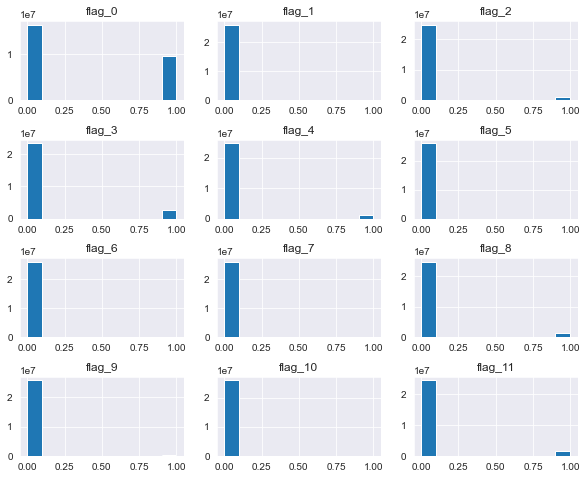

In [166]:
payments.loc[:, 'flag_0': 'flag_11'].astype(int).hist(figsize=(10,8))

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
#  добавить признак сумма флагов - done
# is_outgoing сумма единиц и сумма нулей - два признака - done
# кол-во транзакций на клиента - done
# заполнить наны с помощью ffill или bfill

In [85]:
payments.groupby('client_id').apply(lambda x: sum(x.loc[:, 'flag_0':'flag_11'].sum()))

client_id
100045     320
100055     538
100068     461
100076     102
100089    1362
          ... 
99975       50
999759     178
999784      56
99979       67
99999      287
Length: 67005, dtype: int64

In [168]:
for i in range(12):
    print(payments[f'flag_{i}'].value_counts())

False    16366876
True      9571114
Name: flag_0, dtype: int64
False    25868847
True        69143
Name: flag_1, dtype: int64
False    24859505
True      1078485
Name: flag_2, dtype: int64
False    23258247
True      2679743
Name: flag_3, dtype: int64
False    24737267
True      1200723
Name: flag_4, dtype: int64
False    25928800
True         9190
Name: flag_5, dtype: int64
False    25887476
True        50514
Name: flag_6, dtype: int64
False    25936498
True         1492
Name: flag_7, dtype: int64
False    24544703
True      1393287
Name: flag_8, dtype: int64
False    25785917
True       152073
Name: flag_9, dtype: int64
False    25845815
True        92175
Name: flag_10, dtype: int64
False    24333299
True      1604691
Name: flag_11, dtype: int64


In [170]:
payments['is_outgoing'].value_counts()

True     19292431
False     6645559
Name: is_outgoing, dtype: int64

In [9]:
# payments['channel'].fillna(0, inplace=True)

Заменяем пропуски в столбце channel на чаще встречающиеся значение в рамках каждого клиента

In [101]:
payments['channel'] = payments.groupby('client_id')['channel'].transform(lambda x: x.value_counts().index[0])

In [102]:
payments['channel'] = payments['channel'].replace(['app', 'web', 'pos', 'atm'], [1, 2, 3, 4])

In [104]:
for i in range(12):
    print(payments[f'flag_{i}'].isnull().any())

False
False
False
False
False
False
False
False
False
False
False
False


In [142]:
payments['channel'].isnull().any()

False

In [12]:
payments[payments['client_id'] == '100045']['channel'].value_counts().mode()

0      1
1     17
2     54
3    121
4    284
dtype: int64

<AxesSubplot:>

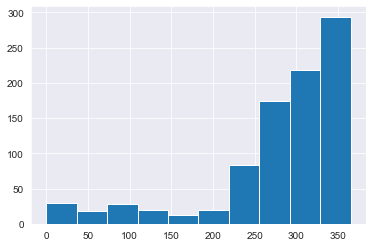

In [13]:
payments[payments['client_id'] == '696595']['dt_day'].hist()

In [14]:
payments[payments['client_id'] == '696595']['dt_day'].skew(), payments[payments['client_id'] == '696595']['dt_day'].kurtosis()

(-1.755500701321834, 2.509449921738676)

In [15]:
int(payments[payments['client_id'] == '696595']['dt_day'].mean()), int(payments[payments['client_id'] == '696595']['dt_day'].std())

(279, 84)

<AxesSubplot:>

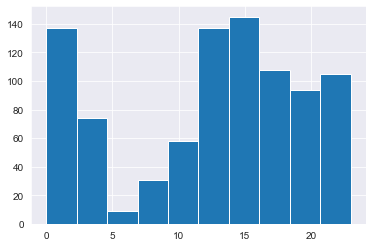

In [16]:
payments[payments['client_id'] == '696595']['dt_hour'].hist()

In [17]:
payments[payments['client_id'] == '696595']['channel'].value_counts().index[0]

0.0

In [18]:
payments[payments['client_id'] == '696595']['channel'].value_counts()

0.0    419
2.0    266
3.0    209
1.0      4
Name: channel, dtype: int64

<AxesSubplot:>

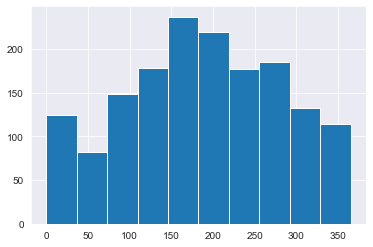

In [19]:
payments[payments['client_id'] == '421133']['dt_day'].hist()

In [20]:
payments[payments['client_id'] == '421133']['dt_day'].skew(), payments[payments['client_id'] == '421133']['dt_day'].kurtosis()

(-0.1112287070795326, -0.8202686931936789)

In [21]:
int(payments[payments['client_id'] == '421133']['dt_day'].mean()), int(payments[payments['client_id'] == '421133']['dt_day'].std())

(187, 92)

<AxesSubplot:>

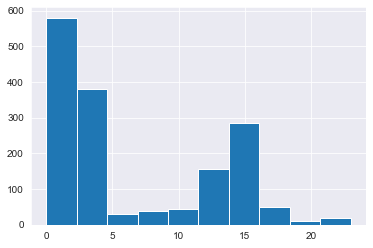

In [22]:
payments[payments['client_id'] == '421133']['dt_hour'].hist()

In [23]:
payments[payments['client_id'] == '421133']['channel'].value_counts()

3.0    781
0.0    603
4.0    178
1.0     35
Name: channel, dtype: int64

В данных имеются платежи клиентов, где контрагентами выступают они же сами, по факту это переводы между своими счетами и они не дают информации о виде экономической деятельности клиента, поэтому попробуем отбросить эти данные.

In [24]:
payments[payments['client_id'] == '421133'].head(20)

,client_id,contractor_id,is_outgoing,amount,dt_day,dt_hour,channel,flag_0,flag_1,flag_2,flag_3,flag_4,flag_5,flag_6,flag_7,flag_8,flag_9,flag_10,flag_11
19977,100089,589103,True,11107059,289,16,1.0,False,False,False,False,False,False,False,False,False,False,False,False
59098,100089,NaN,True,3530752,159,13,0.0,False,False,False,True,False,False,False,False,False,False,False,False
61855,100089,NaN,False,41501303,312,19,0.0,False,False,False,False,False,False,False,False,False,False,False,True
71737,100089,NaN,False,25443299,186,22,0.0,False,False,False,False,False,False,False,False,False,False,False,True
95400,100089,NaN,True,87218541,253,13,2.0,False,False,False,False,False,False,False,False,False,False,False,False
115726,100089,NaN,False,28531050,21,22,0.0,False,False,False,False,False,False,False,False,False,False,False,True
117914,100089,NaN,False,36490026,165,0,0.0,False,False,False,False,False,False,False,False,False,False,False,True
126382,100089,NaN,False,23496319,7,21,0.0,False,False,False,False,False,False,False,False,False,False,False,True
162362,100089,NaN,False,42869914,81,19,0.0,False,False,False,False,False,False,False,False,False,False,False,True
184224,100089,NaN,True,1995936,99,16,0.0,False,False,False,True,False,False,False,False,False,False,False,False


In [12]:
target_dtypes = {
    'client_id': str
}
for i in range(35):
    target_dtypes[f'type_{i}'] = int

In [13]:
target = pd.read_csv(TARGET_TRAIN_PATH, dtype=target_dtypes)
target.head()

,client_id,type_0,type_1,type_2,type_3,type_4,type_5,type_6,type_7,type_8,...,type_25,type_26,type_27,type_28,type_29,type_30,type_31,type_32,type_33,type_34
0,775943,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,992314,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,255821,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,188791,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,46092,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
target['client_id'].value_counts()

211594    1
397780    1
174358    1
260369    1
676924    1
         ..
299737    1
318245    1
412846    1
69491     1
42253     1
Name: client_id, Length: 67005, dtype: int64

In [15]:
target = target.set_index('client_id')

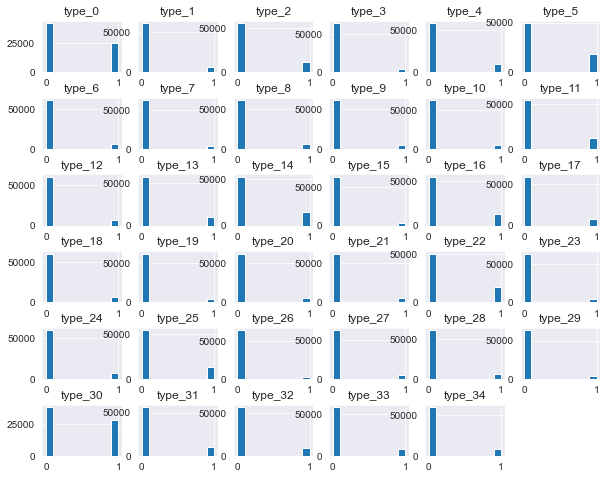

In [20]:
target.hist(figsize=(10, 8))

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
# clients = pd.read_csv(CLIENT_ID_TEST_PATH)
# clients.head()

In [34]:
# clients.shape # число уникальных клиентов

(22045, 1)

In [24]:
payments[payments['client_id'] == '749859']['is_outgoing'].value_counts()

True    54
Name: is_outgoing, dtype: int64

In [19]:
target

,type_0,type_1,type_2,type_3,type_4,type_5,type_6,type_7,type_8,type_9,...,type_25,type_26,type_27,type_28,type_29,type_30,type_31,type_32,type_33,type_34
client_id,,,,,,,,,,,,,,,,,,,,,
775943,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
992314,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
255821,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
188791,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
46092,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20306,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
406742,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
242611,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
new_payments = clear_same_data(payments)

In [48]:
new_payments['client_id'].value_counts()

274567    2015
611966    2014
727130    2013
750738    2013
705250    2011
          ... 
291226       5
583165       5
908821       4
523094       3
72474        2
Name: client_id, Length: 67003, dtype: int64

In [72]:
payments['client_id'].value_counts()

750738    2017
727130    2016
557894    2016
611966    2016
274567    2015
          ... 
530813      36
365741      36
592555      36
549997      31
344826      30
Name: client_id, Length: 67005, dtype: int64

In [74]:
np.where(payments['client_id'].value_counts().index.isin(new_payments['client_id'].value_counts().index) == False)[0]

array([15551, 41610])

In [87]:
(payments['client_id'].value_counts().index)[41610]

'438028'

In [174]:
payments[payments['contractor_id'] == '471487'].head(20)

,client_id,contractor_id,is_outgoing,amount,dt_day,dt_hour,channel,flag_0,flag_1,flag_2,flag_3,flag_4,flag_5,flag_6,flag_7,flag_8,flag_9,flag_10,flag_11
267,610174,471487,False,7241916,320,13,3,False,False,False,False,False,False,False,False,False,False,False,False
583,294570,471487,False,1998299,191,8,1,False,False,False,False,False,False,False,False,False,False,False,False
605,84900,471487,False,37628133,282,10,3,False,False,False,False,False,False,False,False,False,False,False,False
668,316965,471487,False,755817,165,13,4,False,False,False,False,False,False,False,False,False,False,False,False
725,35734,471487,False,134914931,312,10,2,False,False,False,False,False,False,False,False,False,False,False,False
741,868722,471487,False,6906328,266,10,1,False,False,False,False,False,False,False,False,False,False,False,False
799,116340,471487,False,102143,100,8,1,False,False,False,False,False,False,False,False,False,False,False,False
856,911602,471487,False,1646762,281,11,3,False,False,False,False,False,False,False,False,False,False,False,False
908,424582,471487,False,55038226,364,10,2,False,False,False,False,False,False,False,False,False,False,False,False
968,233155,471487,False,81428599,92,8,1,False,False,False,False,False,False,False,False,False,False,False,False


In [99]:
contractor_ids = payments['contractor_id'].value_counts().head(5).index

In [100]:
payments.loc[~payments['contractor_id'].isin(contractor_ids), 'contractor_id']=0

In [101]:
pd.get_dummies(payments, columns=['contractor_id'])

,client_id,is_outgoing,amount,dt_day,dt_hour,channel,flag_0,flag_1,flag_2,flag_3,...,flag_7,flag_8,flag_9,flag_10,flag_11,contractor_id_0,contractor_id_471487,contractor_id_58960,contractor_id_602806,contractor_id_919849
15262037,100045,True,436225,0,6,NaN,False,False,False,False,...,False,False,False,False,False,1,0,0,0,0
8421273,100045,True,4098351,0,10,NaN,False,False,False,False,...,False,False,False,False,False,1,0,0,0,0
8494142,100045,True,8298024,0,10,web,False,False,False,False,...,False,False,False,False,False,1,0,0,0,0
8677465,100045,True,438075,1,5,NaN,False,False,False,False,...,False,False,False,False,False,1,0,0,0,0
22563644,100045,True,1132597,7,14,pos,True,False,False,False,...,False,False,False,False,False,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6895597,99999,True,216892884,344,11,app,False,False,False,False,...,False,False,False,False,False,1,0,0,0,0
25684774,99999,False,201175674,344,15,NaN,False,False,False,False,...,False,False,False,False,False,1,0,0,0,0
14365102,99999,False,191168227,345,15,NaN,False,False,False,False,...,False,False,False,False,False,1,0,0,0,0
19818501,99999,True,170301233,345,16,app,False,False,False,False,...,False,False,False,False,False,1,0,0,0,0


In [89]:
new_payments[new_payments['client_id'] == '438028']

,client_id,contractor_id,is_outgoing,amount,dt_day,dt_hour,channel,flag_0,flag_1,flag_2,flag_3,flag_4,flag_5,flag_6,flag_7,flag_8,flag_9,flag_10,flag_11


In [86]:
target.loc[['681013']]

,type_0,type_1,type_2,type_3,type_4,type_5,type_6,type_7,type_8,type_9,...,type_25,type_26,type_27,type_28,type_29,type_30,type_31,type_32,type_33,type_34
client_id,,,,,,,,,,,,,,,,,,,,,
681013,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [90]:
target.loc[['438028']]

,type_0,type_1,type_2,type_3,type_4,type_5,type_6,type_7,type_8,type_9,...,type_25,type_26,type_27,type_28,type_29,type_30,type_31,type_32,type_33,type_34
client_id,,,,,,,,,,,,,,,,,,,,,
438028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [103]:
payments = pd.get_dummies(payments, columns=['channel'])

In [192]:
payments.head()

,client_id,contractor_id,is_outgoing,amount,dt_day,dt_hour,flag_0,flag_1,flag_2,flag_3,...,flag_6,flag_7,flag_8,flag_9,flag_10,flag_11,channel_app,channel_atm,channel_pos,channel_web
0,569703,NaN,True,8674442,56,12,False,False,False,False,...,False,False,False,False,False,False,1,0,0,0
1,696595,3920,True,5714350,311,19,False,False,False,False,...,False,False,False,False,False,False,0,0,0,1
2,368467,NaN,True,3720501,175,13,False,False,False,True,...,False,False,False,False,False,False,0,0,0,0
3,421133,NaN,True,311542,68,14,False,False,False,True,...,False,False,False,False,False,False,0,0,0,0
4,365044,24686,True,705918747,171,15,False,False,False,False,...,False,False,False,False,False,False,1,0,0,0


In [104]:
payments.groupby('client_id').agg({'channel_app': 'sum', 'channel_atm': 'sum', 'channel_pos': 'sum','channel_web': 'sum', 'contractor_id':'nunique'})

,channel_app,channel_atm,channel_pos,channel_web,contractor_id
client_id,,,,,
100045,1.0,54.0,121.0,17.0,1
100055,0.0,79.0,99.0,158.0,1
100068,37.0,22.0,320.0,14.0,1
100076,6.0,10.0,26.0,7.0,1
100089,243.0,62.0,92.0,21.0,1
...,...,...,...,...,...
99975,1.0,2.0,0.0,0.0,1
999759,0.0,0.0,135.0,12.0,1
999784,2.0,0.0,0.0,41.0,1


In [106]:
payments[payments['client_id'] == '100045'].head(20)

,client_id,contractor_id,is_outgoing,amount,dt_day,dt_hour,flag_0,flag_1,flag_2,flag_3,...,flag_6,flag_7,flag_8,flag_9,flag_10,flag_11,channel_app,channel_atm,channel_pos,channel_web
15262037,100045,0,True,436225,0,6,False,False,False,False,...,False,False,False,False,False,False,0,0,0,0
8421273,100045,0,True,4098351,0,10,False,False,False,False,...,False,False,False,False,False,False,0,0,0,0
8494142,100045,0,True,8298024,0,10,False,False,False,False,...,False,False,False,False,False,False,0,0,0,1
8677465,100045,0,True,438075,1,5,False,False,False,False,...,False,False,False,False,False,False,0,0,0,0
22563644,100045,0,True,1132597,7,14,True,False,False,False,...,False,False,False,False,False,False,0,0,1,0
21062140,100045,0,False,10769460,13,9,False,False,False,False,...,False,False,False,False,False,False,0,0,0,0
9787429,100045,0,True,107924,14,8,False,False,False,True,...,False,False,False,False,False,False,0,0,0,0
13105835,100045,0,True,253128,15,7,False,False,False,False,...,False,False,False,False,False,False,0,0,0,0
14738476,100045,0,True,1160604,15,12,False,False,False,False,...,False,False,False,False,False,False,0,0,0,0
17114360,100045,0,False,1160604,15,12,False,False,False,False,...,False,False,False,False,False,False,0,0,0,0


In [185]:
payments.groupby('client_id').agg({'channel_2':'count'})

,channel_2
client_id,
100045,477
100055,651
100068,519
100076,93
100089,1584
...,...
99975,50
999759,273
999784,85


In [20]:
target[['1', '2', '3', '4']] = 

In [22]:
df = payments.groupby('client_id').agg({'channel_app': 'sum', 'channel_atm': 'sum', 'channel_pos': 'sum','channel_web': 'sum'})

In [23]:
target.merge(df, left_index = True, right_index=True)

,type_0,type_1,type_2,type_3,type_4,type_5,type_6,type_7,type_8,type_9,...,type_33,type_34,1,2,3,4,channel_app,channel_atm,channel_pos,channel_web
client_id,,,,,,,,,,,,,,,,,,,,,
775943,1,0,0,0,0,1,0,0,0,0,...,0,0,0.0,15.0,899.0,129.0,0.0,15.0,899.0,129.0
992314,0,0,1,0,0,0,0,0,0,0,...,0,0,69.0,58.0,1151.0,0.0,69.0,58.0,1151.0,0.0
255821,1,0,0,0,0,0,0,0,0,1,...,1,0,57.0,0.0,1.0,5.0,57.0,0.0,1.0,5.0
188791,0,0,1,0,0,0,0,0,0,1,...,0,0,8.0,0.0,0.0,59.0,8.0,0.0,0.0,59.0
46092,0,0,0,0,0,0,0,0,0,1,...,0,0,6.0,0.0,75.0,2.0,6.0,0.0,75.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20306,0,0,0,0,0,0,0,0,0,0,...,0,1,2.0,94.0,424.0,0.0,2.0,94.0,424.0,0.0
406742,1,0,0,0,0,0,0,0,0,0,...,0,0,0.0,40.0,65.0,0.0,0.0,40.0,65.0,0.0
242611,1,0,0,0,0,0,0,0,1,0,...,0,0,0.0,0.0,0.0,413.0,0.0,0.0,0.0,413.0


In [26]:
target.loc[['775943']]

,type_0,type_1,type_2,type_3,type_4,type_5,type_6,type_7,type_8,type_9,...,type_29,type_30,type_31,type_32,type_33,type_34,1,2,3,4
client_id,,,,,,,,,,,,,,,,,,,,,
775943,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0.0,15.0,899.0,129.0


In [34]:
payments.groupby('client_id').agg({'dt_hour': ['skew', 'mean', 'std']})

dt_hour                     
               skew       mean       std
client_id                               
100045     0.279852   8.597484  6.193097
100055    -0.496758  10.657450  5.061865
100068     1.110887   5.645472  5.491089
100076     0.633382   7.043011  6.759718
100089    -0.419532  13.543561  7.547993
...             ...        ...       ...
99975     -0.678132  11.860000  5.764104
999759     1.091999   6.457875  6.584230
999784     0.826299   8.929412  5.430926
99979      0.392496   9.283784  8.131657
99999     -0.532113  11.631420  4.363427

[67005 rows x 3 columns]

## Feature Engineering

In [26]:
payments['is_outgoing'].isnull().any() #нет пропусков

False

In [27]:
def percentage_outgoing(x):
    counts = x.value_counts(normalize=True)
    if len(counts.index) == 2:
        return counts[0]
    
    elif len(counts.index) == 1 and counts.index == 0:
        return 1
    
    elif len(counts.index) == 1 and counts.index == 1:
        return 0
    
    else:
        return 'Error'

In [28]:
def clear_false_data(payments):
    return payments.drop(payments.index[np.where((payments.loc[:, 'flag_0': 'flag_11'] == False).all(axis=1))[0]])

In [45]:
def clear_same_data(payments):
    return payments.drop(payments.index[np.where((payments.loc[:, 'client_id'] == payments.loc[:, 'contractor_id']))[0]])

In [29]:
def generate_features(payments):
#     payments = clear_false_data(payments)
    
    groupby_client = payments.groupby('client_id')
        
    fts = groupby_client['amount'].agg(['mean', 'median', 'std', 'min', 'max'])
    fts[[f'flag_{i}_count' for i in range(12)]] = groupby_client[[f'flag_{i}' for i in range(12)]].sum()

    is_outgoing_counts = groupby_client.apply(lambda x: percentage_outgoing(x['is_outgoing']))
    fts['0% outgoing'] = is_outgoing_counts
    
    df = groupby_client.agg({'channel_app': 'sum', 'channel_atm': 'sum', 'channel_pos': 'sum','channel_web': 'sum', \
                            'dt_hour': ['skew', 'mean', 'std'], 'dt_day': ['skew', 'mean', 'std'], 'is_outgoing': 'sum', 'is_outgoing': 'count'})
    fts = fts.merge(df, left_index = True, right_index=True)
    
    fts['flags_sum'] = groupby_client.apply(lambda x: sum(x.loc[:, 'flag_0':'flag_11'].sum()))
    
#     dt_day_skew = groupby_client.apply(lambda x: x['dt_day'].skew())
    dt_day_kurt = groupby_client.apply(lambda x: x['dt_day'].kurtosis())
#     dt_day_mean = groupby_client.apply(lambda x: x['dt_day'].mean())
#     dt_day_std = groupby_client.apply(lambda x: x['dt_day'].std())
    
#     fts['dt_day_skew'] = dt_day_skew
    fts['dt_day_kurtosis'] = dt_day_kurt
#     fts['dt_day_mean'] = dt_day_mean
#     fts['dt_day_std'] = dt_day_std
    
#     dt_hour_skew = groupby_client.apply(lambda x: x['dt_hour'].skew())
    dt_hour_kurt = groupby_client.apply(lambda x: x['dt_hour'].kurtosis())
#     dt_hour_mean = groupby_client.apply(lambda x: x['dt_hour'].mean())
#     dt_hour_std = groupby_client.apply(lambda x: x['dt_hour'].std())
    
#     fts['dt_hour_skew'] = dt_hour_skew
    fts['dt_hour_kurtosis'] = dt_hour_kurt
#     fts['dt_hour_mean'] = dt_hour_mean
#     fts['dt_hour_std'] = dt_hour_std
    
#     most_channel = groupby_client.apply(lambda x: x['channel'].value_counts().index[0])
#     fts['most channel'] = most_channel

    return fts

In [30]:
features = generate_features(payments)
features

NameError: name 'percentage_outgoing' is not defined

In [106]:
# features.to_csv('features_data.csv')

In [ ]:
# features = pd.read_csv('features_data.csv')

In [107]:
import random
SEED = 0xCAFEC0DE

random.seed(SEED)
np.random.seed(SEED)

In [108]:
features.shape

(67005, 27)

In [34]:
# target = target.loc[features.index]

In [109]:
def stratified_split_cached(X, y, split_idx_file):
    if os.path.isfile(split_idx_file):
        with open(split_idx_file, 'r') as f:
            split_json = json.load(f)
        train_idx, val_idx = split_json['train'], split_json['val']
    else:
        y_shuffle = sku.shuffle(y, random_state=SEED)
        train_idx, _, val_idx, _ = iterative_train_test_split(np.expand_dims(y_shuffle.index, 1), np.array(y_shuffle), test_size=0.15)
        train_idx, val_idx = train_idx.squeeze(1), val_idx.squeeze(1)
        with open(split_idx_file, 'w') as f:
            json.dump({'train': list(train_idx), 'val': list(val_idx)}, f)
    return X.loc[train_idx], y.loc[train_idx], X.loc[val_idx], y.loc[val_idx]

In [110]:
X_train, y_train, X_val, y_val = stratified_split_cached(features, target, 'split_cache.json')

In [111]:
len(X_train), len(y_train), len(X_val), len(y_val)

(57169, 57169, 9836, 9836)

In [112]:
X_train

,mean,median,std,min,max,flag_0_count,flag_1_count,flag_2_count,flag_3_count,flag_4_count,...,0% outgoing,dt_day_skew,dt_day_kurtosis,dt_day_mean,dt_day_std,dt_hour_skew,dt_hour_kurtosis,dt_hour_mean,dt_hour_std,most channel
client_id,,,,,,,,,,,,,,,,,,,,,
726736,1.782003e+08,166450463.5,1.873942e+08,31134,726200213,0,0,0,28,10,...,0.256410,-0.194533,-1.066563,248.256410,65.966823,-0.697994,1.821478,13.615385,4.649342,1
438388,2.085516e+07,2544355.5,3.834703e+07,2409,170421023,97,0,21,13,24,...,0.125000,0.712821,-1.123845,109.826087,87.565945,-0.019392,-1.329685,9.320652,6.509380,3
190365,1.506990e+07,2655680.0,5.225610e+07,37331,671071999,334,0,10,35,6,...,0.040816,0.375716,-0.441434,221.469388,64.844801,0.083047,-1.420232,8.852041,6.554789,3
492139,1.564197e+07,11660683.5,1.796033e+07,64964,94829059,0,0,0,25,9,...,0.388889,0.021944,-1.064533,208.111111,98.189549,0.377693,-0.420925,8.595238,5.420227,1
418549,3.335281e+07,11048505.0,6.201364e+07,626,557904642,0,0,0,8,9,...,0.818182,0.233055,-1.070113,175.363636,99.170670,-0.462245,0.611210,11.874126,4.965661,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399347,3.668457e+07,4704610.0,6.428507e+07,63384,357004808,22,0,21,41,10,...,0.180645,0.336881,-1.510440,164.122581,125.030299,-0.447693,1.369693,12.954839,4.240102,2
470557,4.295133e+07,1210504.0,8.892837e+07,2928,506319917,2,0,0,43,0,...,0.442105,-0.432848,-0.994656,120.431579,58.239720,-0.763291,0.947562,12.347368,5.146303,1
42811,5.099055e+07,3634531.0,1.492271e+08,88,991314308,151,41,17,51,11,...,0.219638,0.848495,-0.153191,120.369509,94.376220,0.119465,-1.243798,9.568475,6.870176,3


In [113]:
y_train

,type_0,type_1,type_2,type_3,type_4,type_5,type_6,type_7,type_8,type_9,...,type_25,type_26,type_27,type_28,type_29,type_30,type_31,type_32,type_33,type_34
client_id,,,,,,,,,,,,,,,,,,,,,
726736,1,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
438388,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
190365,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
492139,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
418549,0,1,1,0,0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399347,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
470557,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Modelling

### Cat Boost

In [76]:
import catboost as cb

In [127]:
def make_pool(X, y=None):
    return cb.Pool(X, y)

In [ ]:
models = []
for i in range(35):
    print('Fitting model', i)
    
    model = cb.CatBoostClassifier(iterations=250, loss_function='Logloss', random_seed=SEED)
    
    pool_train, pool_val = make_pool(X_train, y_train[f'type_{i}']), make_pool(X_val, y_val[f'type_{i}'])
    
    model.fit(pool_train, eval_set=pool_val, plot=False, verbose=200)
    
    models.append(model)

In [80]:
def predict(X, model_zoo):
    preds = [model.predict(make_pool(X)) for i, model in enumerate(model_zoo)]
    preds = pd.DataFrame(np.array(preds).transpose(1, 0), index=X.index, columns=[f'type_{i}' for i in range(35)]).astype(int)
    return preds

In [81]:
preds = predict(X_val, models)
print(fbeta_score(y_val, preds, beta=0.5, average='micro', zero_division=0))

0.29610837740163753


### XGBoost

In [ ]:
models = []
for i in range(35):
    model = XGBClassifier()
    model.fit(X_train, y_train[f'type_{i}'])
    
    models.append(model)

In [ ]:
results_yi = []
score_yi = []

for i in range(35):
    prediction_yi = models[i].predict(X_val)
    results_yi.append(prediction_yi)
    score_yi.append(fbeta_score(y_val[f'type_{i}'], prediction_yi, beta=0.5, average='micro', zero_division=0))

In [ ]:
classes = []
for i in range(35):
    classes.append(f'type_{i}')

In [ ]:
prediction = pd.DataFrame(np.array(results_yi).T, columns=classes, index=y_val.index)

In [ ]:
prediction

In [ ]:
print(fbeta_score(y_val, prediction, beta=0.5, average='micro', zero_division=0))

In [117]:
np.array(score_yi)

array([0.67252948, 0.90666938, 0.81649044, 0.94438796, 0.86010573,
       0.74359496, 0.91571777, 0.94377796, 0.90229768, 0.92120781,
       0.92801952, 0.81100041, 0.89833266, 0.849939  , 0.77602684,
       0.95130134, 0.8203538 , 0.87921919, 0.90138268, 0.9305612 ,
       0.9205978 , 0.91490443, 0.7593534 , 0.93798292, 0.87769418,
       0.79280195, 0.95028467, 0.9243595 , 0.90951606, 0.94174461,
       0.6307442 , 0.83397723, 0.85187068, 0.86823912, 0.87962586])

In [143]:
model = XGBClassifier()

In [144]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [145]:
prediction = model.predict(X_val)

In [146]:
print(fbeta_score(y_val, prediction, beta=0.5, average='micro', zero_division=0))

0.3166248856467345


In [147]:
print(classification_report(y_val, prediction))

              precision    recall  f1-score   support

           0       0.61      0.39      0.48      3757
           1       0.44      0.01      0.02       917
           2       0.48      0.07      0.12      1795
           3       0.13      0.00      0.01       537
           4       0.41      0.01      0.03      1367
           5       0.55      0.27      0.36      2674
           6       0.32      0.01      0.03       822
           7       1.00      0.00      0.01       547
           8       0.34      0.01      0.03       952
           9       0.42      0.01      0.01       777
          10       0.39      0.02      0.03       705
          11       0.44      0.05      0.09      1841
          12       0.50      0.02      0.04      1000
          13       0.52      0.13      0.21      1500
          14       0.31      0.01      0.03      2180
          15       0.68      0.06      0.11       497
          16       0.70      0.14      0.24      1888
          17       0.55    

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [148]:
feature_result = pd.DataFrame(model.feature_importances_, X_train.columns)
feature_result.columns = ['result']
feature_result = feature_result.sort_values(by='result', ascending=False)
feature_result = feature_result[feature_result['result']>0.0001]

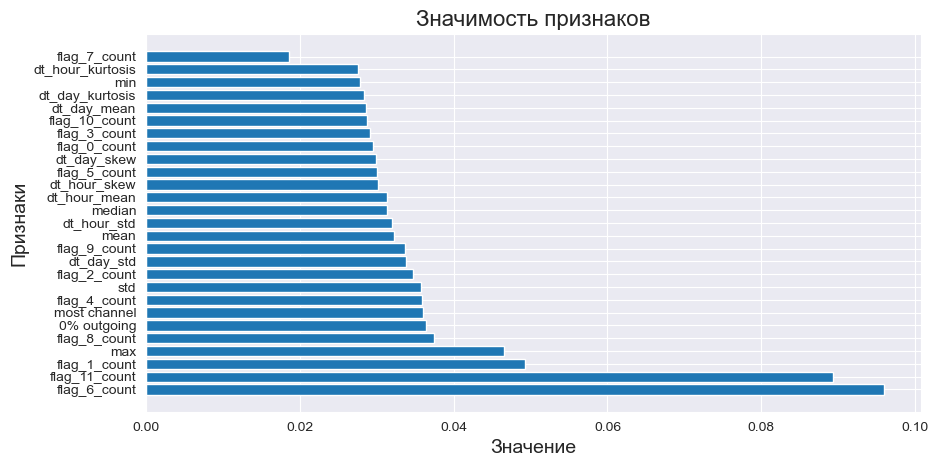

In [149]:
plt.subplots(figsize=(10, 5), dpi=100)
plt.barh(feature_result.index, feature_result['result'])

plt.title('Значимость признаков', fontsize=16)
plt.xlabel('Значение', fontsize=14)
plt.ylabel('Признаки', fontsize=14)
plt.show()

### Chain Classifier

In [136]:
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.ensemble import LabelSpacePartitioningClassifier, MajorityVotingClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.multioutput import ClassifierChain

chain_cls = ClassifierChain(XGBClassifier(max_depth=8))
# chain_cls = ClassifierChain(cb.CatBoostClassifier(iterations=400, loss_function='Logloss', random_seed=SEED, verbose=200), random_state=5, cv=5)

In [137]:
chain_cls.fit(X_train, y_train)

ClassifierChain(classifier=XGBClassifier(base_score=0.5, booster='gbtree',
                                         callbacks=None, colsample_bylevel=1,
                                         colsample_bynode=1, colsample_bytree=1,
                                         early_stopping_rounds=None,
                                         enable_categorical=False,
                                         eval_metric=None, gamma=0, gpu_id=-1,
                                         grow_policy='depthwise',
                                         importance_type=None,
                                         interaction_constraints='',
                                         learning_rate=0.300000012, max_bin=256,
                                         max_cat_to_onehot=4, max_delta_step=0,
                                         max_depth=8, max_leaves=0,
                                         min_child_weight=1, missing=nan,
                                         monotone_

In [138]:
chain_prediction = chain_cls.predict(X_val)

In [139]:
print(fbeta_score(y_val, chain_prediction, beta=0.5, average='micro', zero_division=0))

0.31890624836491877


### ML KNN 

In [156]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

mlknn = MLkNN(k=5)

X_train_sp = lil_matrix(X_train).toarray()
y_train_sp = lil_matrix(y_train).toarray()
X_val_sp = lil_matrix(X_val).toarray()

mlknn.fit(X_train_sp, y_train_sp)

MLkNN(k=5)

In [157]:
mlknn_prediction = mlknn.predict(X_val_sp)

In [158]:
print(fbeta_score(y_val, mlknn_prediction, beta=0.5, average='micro', zero_division=0))

0.2427807929734432


### LabelPowerset

In [ ]:
from skmultilearn.problem_transform import LabelPowerset
from sklearn.linear_model import LogisticRegression
# initialize label powerset multi-label classifier
model = LabelPowerset(LogisticRegression())

# model.fit(X_train, y_train)

In [ ]:
print(fbeta_score(y_val, prediction, beta=0.5, average='micro', zero_division=0))

### Neural Network

In [37]:
os.environ["CUDA_VISIBLE_DEVICES"]='1'

In [ ]:
from numpy import asarray
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf

In [ ]:
X_train_tf = tf.convert_to_tensor(X_train.values)
X_test_tf = tf.convert_to_tensor(X_val.values)
y_train_tf = tf.convert_to_tensor(y_train.values)
y_test_tf = tf.convert_to_tensor(y_val.values)

def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(10, input_dim=n_inputs, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(10, input_dim=n_inputs, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(20, input_dim=n_inputs, activation='relu'))
    model.add(Dense(35, input_dim=n_inputs, activation='relu'))
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

X, y = X_train_tf, y_train_tf
n_inputs, n_outputs = X.shape[1], y.shape[1]

model = get_model(n_inputs, n_outputs)

model.fit(X, y, validation_split=0.15, epochs=10, batch_size=15)

prec = model.evaluate(X_test_tf, y_test_tf)[1]
print("F: {} %".format(round(prec*100,2)))

In [ ]:
prediction = model.predict(X_test_tf)
prediction = prediction > 0.25

In [ ]:
print(fbeta_score(y_test_tf, prediction, beta=0.5, average='micro', zero_division=0))

## Submission

In [22]:
payments_test = pd.read_csv(PAYMENTS_TEST_PATH, dtype=payments_dtypes)
payments_test

,client_id,contractor_id,is_outgoing,amount,dt_day,dt_hour,channel,flag_0,flag_1,flag_2,flag_3,flag_4,flag_5,flag_6,flag_7,flag_8,flag_9,flag_10,flag_11
0,303546,NaN,True,378449,50,2,NaN,False,False,False,True,False,False,False,False,False,False,False,False
1,59719,NaN,True,281527,267,2,pos,True,False,False,False,False,False,False,False,False,False,False,False
2,25428,90165,False,2105146744,294,9,NaN,False,False,False,False,False,False,False,False,False,False,False,False
3,766314,NaN,True,2156082,207,14,pos,True,False,False,False,False,False,False,False,False,False,False,False
4,465049,NaN,True,51694546,211,3,atm,True,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8553957,794745,773056,False,858062290,198,16,NaN,False,False,False,False,False,False,False,False,False,False,False,False
8553958,362168,904134,False,8540123,130,13,NaN,False,False,False,False,False,False,False,False,False,False,False,False
8553959,500006,471487,False,65346645,196,12,NaN,False,False,False,False,False,False,False,False,False,False,False,False
8553960,653741,NaN,True,3296030,43,0,NaN,True,False,False,False,False,False,False,False,False,False,False,False


In [115]:
payments_test['channel'] = payments_test['channel'].replace(['app', 'web', 'pos', 'atm'], [1, 2, 3, 4])

In [116]:
payments_test['channel'].fillna(0, inplace=True)

In [117]:
features_test = generate_features(payments_test)
features_test

,mean,median,std,min,max,flag_0_count,flag_1_count,flag_2_count,flag_3_count,flag_4_count,...,0% outgoing,dt_day_skew,dt_day_kurtosis,dt_day_mean,dt_day_std,dt_hour_skew,dt_hour_kurtosis,dt_hour_mean,dt_hour_std,most channel
client_id,,,,,,,,,,,,,,,,,,,,,
100050,3.536920e+07,4800238.5,7.702827e+07,798,474601237,7,0,0,35,13,...,0.268750,-0.221948,-1.262191,190.000000,109.455485,-0.744194,0.209803,12.725000,5.887787,0.0
100128,2.074924e+08,42574180.0,5.213882e+08,2401,4263233615,0,0,0,19,11,...,0.195876,0.809246,-0.773154,163.237113,98.462638,-0.591393,2.382347,14.340206,4.135433,0.0
100159,1.516675e+08,79896060.0,2.081792e+08,17615,1348514255,0,0,0,11,52,...,0.399464,0.186463,-1.251738,170.028150,111.647025,0.319748,-0.124211,11.292225,3.939866,2.0
10018,5.424148e+07,26540880.5,1.042072e+08,43,808270306,0,0,0,17,13,...,0.720000,1.182252,0.667550,81.920000,74.408455,-1.241456,2.479280,13.945714,3.836922,0.0
100237,2.005865e+08,50737877.0,3.939886e+08,31511,2521806684,16,0,12,28,2,...,0.160377,-0.038280,-0.800466,239.830189,61.305243,-0.567716,-0.430711,11.915094,5.941169,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999572,4.462335e+07,21529563.0,8.773594e+07,2137,1586323663,0,0,0,22,76,...,0.433766,-0.006439,-1.395026,185.229870,111.300051,-0.559926,0.970469,13.524675,3.980125,0.0
99966,5.238860e+07,950112.0,2.225828e+08,578,2924402093,701,0,14,17,26,...,0.058275,-0.287234,-1.328350,197.534965,114.655475,1.631355,1.766616,4.870629,5.666401,3.0
999662,3.545021e+07,5060146.5,9.601183e+07,19606,947093072,232,0,20,8,20,...,0.172500,0.541811,-0.767081,127.247500,91.680202,0.434157,-1.186454,8.170000,6.911623,3.0


In [131]:
# prediction_test = model.predict(features_test).astype(int)
prediction_test = chain_cls.predict(features_test).astype(int)
prediction_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [132]:
classes = []
for i in range(35):
    classes.append(f'type_{i}')

In [133]:
submission = pd.DataFrame(prediction_test, columns = classes)
submission.head()

,type_0,type_1,type_2,type_3,type_4,type_5,type_6,type_7,type_8,type_9,...,type_25,type_26,type_27,type_28,type_29,type_30,type_31,type_32,type_33,type_34
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
submission['client_id'] = features_test.index

In [135]:
classes.insert(0, 'client_id')

In [136]:
submission = submission[classes]

In [137]:
submission

,client_id,type_0,type_1,type_2,type_3,type_4,type_5,type_6,type_7,type_8,...,type_25,type_26,type_27,type_28,type_29,type_30,type_31,type_32,type_33,type_34
0,100050,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,100128,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100159,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,10018,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100237,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22040,999572,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
22041,99966,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22042,999662,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22043,999674,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
submission.to_csv('submission_chain2.csv', index=False)

In [22]:
from skmultilearn.dataset import load_dataset

X_train, y_train, feature_names, label_names = load_dataset('emotions', 'train')
X_test, y_test, _, _ = load_dataset('emotions', 'test')

emotions:train - does not exists downloading
Downloaded emotions-train
emotions:test - does not exists downloading
Downloaded emotions-test


In [26]:
y_train.toarray()

array([[0, 1, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 1],
       ...,
       [0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 0]])

In [30]:
from skmultilearn.dataset import load_dataset

X_train, y_train, _, _ = load_dataset('scene', 'train')
X_test,  y_test, _, _ = load_dataset('scene', 'test')

scene:train - does not exists downloading
Downloaded scene-train
scene:test - does not exists downloading
Downloaded scene-test


In [34]:
X_test

<1196x294 sparse matrix of type '<class 'numpy.float64'>'
	with 347724 stored elements in List of Lists format>